In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.model_selection import train_test_split

**Built-in Datasets in Sklearn:** The main attributes of the datasets are  
DESCR: to get a comprehensive description of the dataset  
data: to fetch the data of independent variables (features)  
target: to fetch the target variable  
feature_names: to get the names of features  
target_names: to get the names of target classes

In [2]:
from sklearn import datasets
#dir(datasets)

In [3]:
digits = datasets.load_digits()
mnist = datasets.fetch_openml('mnist_784')

In [4]:
train_feat, test_feat, train_targ, test_targ = train_test_split(mnist.data, mnist.target, 
                                                                test_size=0.2, random_state=123)

Normalization across instances should be done after splitting the data between training and test set, using only the data from the training set. So, fit on the training set and then transform on both the training and test sets.

In [5]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(train_feat)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [6]:
train_feat_scaled = scaler.transform(train_feat)
test_feat_scaled = scaler.transform(test_feat)

Principal Component Analysis (PCA): Reduce the number of variables while maintaining the majority of the important information. It transforms a number of variables that may be correlated into a smaller number of uncorrelated variables, known as **principal components**. The principal components are linear combinations of the original variables weighted by their variances (or eigenvalues) in a particular orthogonal dimension.

The explained variance ratio is the percentage of variance that is attributed by each of the selected components. Choose the number of components in the model by adding the explained variance ratio of each component until it reaches certain proportion to avoid overfitting.

Scree-plots display the number of components against the variance explained by each component, sorted in descending order of variance. Scree-plots help us get a better sense of which components explain a sufficient amount of variance in our data. When using scree plots, an 'elbow' (a steep drop from one data point to the next) in the plot is typically used to decide on an appropriate cutoff.

In [7]:
from sklearn.decomposition import PCA
pca = PCA(random_state=123)
pca.fit(train_feat_scaled)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=123,
    svd_solver='auto', tol=0.0, whiten=False)

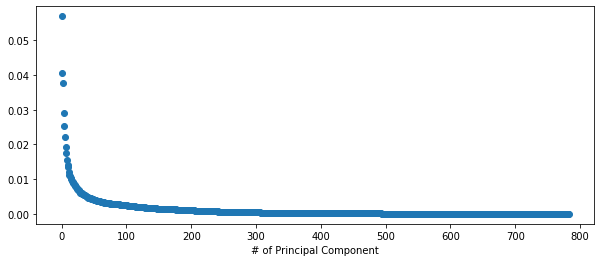

In [8]:
exp_variance = pca.explained_variance_ratio_

# plot the explained variance using a barplot
plt.figure(figsize=[10, 4])
plt.scatter(range(pca.n_components_), exp_variance)
plt.xlabel('# of Principal Component')
plt.show()

Unfortunately, there does not appear to be a clear elbow in this scree plot, which means it is not straightforward to find the number of intrinsic dimensions using this method.

Let scikit-learn choose the minimum number of principal components such that 90% of the variance is retained.

In [9]:
pca = PCA(.90, random_state=123)
pca.fit(train_feat_scaled)
n_components = pca.n_components_
n_components

232

90% of the variance amounts to 232 principal components.

In [10]:
train_feat_pca = pca.transform(train_feat_scaled)
test_feat_pca = pca.transform(test_feat_scaled)

**Decision Tree**

In [11]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(random_state=123)
tree.fit(train_feat_pca, train_targ)

tree_targ_pred = tree.predict(test_feat_pca)

**Logistic Regression**

In [12]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(solver='newton-cg', random_state=123)
logreg.fit(train_feat_pca, train_targ)

logreg_targ_pred= logreg.predict(test_feat_pca)

Create the classification report for both models

In [13]:
from sklearn.metrics import classification_report

class_rep_tree = classification_report(test_targ, tree_targ_pred)
class_rep_log = classification_report(test_targ, logreg_targ_pred)

print('Decision Tree:\n''{}'.format(class_rep_tree))
print('Logistic Regression:\n' '{}'.format(class_rep_log))

Decision Tree:
              precision    recall  f1-score   support

           0       0.88      0.90      0.89      1354
           1       0.95      0.95      0.95      1625
           2       0.82      0.81      0.81      1377
           3       0.77      0.79      0.78      1422
           4       0.80      0.81      0.81      1391
           5       0.74      0.74      0.74      1285
           6       0.89      0.89      0.89      1324
           7       0.82      0.83      0.83      1409
           8       0.75      0.72      0.73      1436
           9       0.75      0.76      0.76      1377

    accuracy                           0.82     14000
   macro avg       0.82      0.82      0.82     14000
weighted avg       0.82      0.82      0.82     14000

Logistic Regression:
              precision    recall  f1-score   support

           0       0.95      0.97      0.96      1354
           1       0.95      0.96      0.96      1625
           2       0.92      0.89      0.9

**Cross Validation**

In [ ]:
from sklearn.model_selection import KFold, cross_val_score

kf = KFold(5)

tree = DecisionTreeClassifier(random_state=123)
logreg = LogisticRegression(solver='newton-cg', random_state=123)

# Train our models using KFold cv
tree_score = cross_val_score(tree, train_feat_pca, train_targ, cv=kf)
logit_score = cross_val_score(logreg, train_feat_pca, train_targ, cv=kf)

# Print the mean of each array of scores
print('Decision Tree:', np.mean(tree_score), ' and  ' 'Logistic Regression:', np.mean(logit_score))

**Inverting PCA:** Go from a compressed representation (232 components) back to an approximation of the scaled value (784 components).

**Inverting Scaling:** Go from a scaled value to an approximation of the original data value.

In [26]:
approx = pca.inverse_transform(train_feat_pca)
train_feat_inv = scaler.inverse_transform(approx)

Plot the 6th images in the original train set and the inverted train set

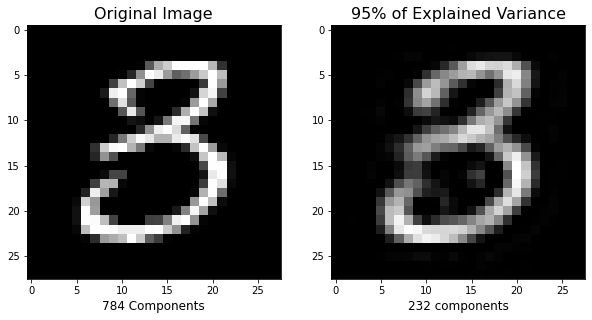

In [38]:
fig, axes = plt.subplots(1, 2, figsize=[10,5])
axes[0].imshow(train_feat[6].reshape(28,28), cmap = plt.cm.gray, interpolation='nearest', clim=(0, 255))
axes[0].set_xlabel('784 Components', fontsize = 12)
axes[0].set_title('Original Image', fontsize = 16)

# 232 principal components
axes[1].imshow(train_feat_inv[6].reshape(28, 28), cmap = plt.cm.gray, interpolation='nearest', clim=(0, 255))
axes[1].set_xlabel('232 components', fontsize = 12)
axes[1].set_title('95% of Explained Variance', fontsize = 16)
plt.show()